# **<center> Project Milestone  - 4**
## <center> Connecting to an API/Pulling in the Data and Cleaning/Formatting

<center> DSC-540

<center> Kalyan Pothineni

In [194]:
# Import the Libraries as needed

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# Load the API key from the JSON file
with open('kalyanpothineni_APIkey_USDAERS.json') as f:
    api_keys = json.load(f)
    API_KEY = api_keys['USDAERSapikey']

In [180]:
# Function to fetch data from the API
def fetch_data(endpoint):
    url = f'https://api.ers.usda.gov/data/arms/{endpoint}?api_key={API_KEY}'
    response = requests.get(url)
    return response.json()

In [181]:
# Function to format data into a DataFrame
def format_data(data):
    if isinstance(data, list):
        # Handle the list of dictionaries structure
        return pd.DataFrame.from_records(data)
    return pd.DataFrame(data)

In [182]:
# Function to replace headers in the DataFrame
def replace_headers(data, new_headers):
    data.columns = new_headers

In [183]:
# Fetch data for different endpoints
year_data = fetch_data('year')
state_data = fetch_data('state')

Data Retrieval: We imported necessary libraries and loaded the API key from a JSON file. Using the API key, we created a function to fetch data from the USDA ERS API.

##### Year Data Formatting

In [184]:
# Extract the list of years from year_data
years = year_data['data']

# Create a DataFrame from the years list
year_df = pd.DataFrame(years, columns=['Year'])

# Replace headers for the year dataset
year_headers = ['YEAR']
replace_headers(year_df, year_headers)

# Print the DataFrame
year_df.head()

,YEAR
0,2021
1,2020
2,2019
3,2018
4,2017


- Data Formatting - Year Data: We fetched data for the 'year' endpoint and created a DataFrame 'year_df' to store the years. We then replaced the headers and printed the DataFrame.

##### State Data Formatting

In [185]:
# Extract the list of data from state_data
state = state_data['data']

# Create a DataFrame from the state list
state_df = pd.DataFrame(state)

# Replace headers for the farmtype dataset
state_headers = ['ID', 'STATE_CODE', 'STATE_NAME']
replace_headers(state_df, state_headers)

# Convert 'ID' column to int 
state_df['ID'] = state_df['ID'].astype(int)

# Convert 'STATE_CODE' column to uppercase (all caps)
state_df['STATE_CODE'] = state_df['STATE_CODE'].str.upper()

# Print the DataFrame
state_df.head()

,ID,STATE_CODE,STATE_NAME
0,0,ALL,All survey states
1,5,AR,Arkansas
2,6,CA,California
3,12,FL,Florida
4,13,GA,Georgia


- Data Formatting - State Data: Similarly, we fetched data for the 'state' endpoint and created the 'state_df' DataFrame to store the state data. We converted 'ID' and 'STATE_CODE' columns to the desired data types and uppercase, respectively, before printing the DataFrame.

##### Survey Data Formatting

In [228]:
# Fetch data from the API for survey data
url = f'https://api.ers.usda.gov/data/arms/surveydata?api_key={API_KEY}&year=2015,2016&state=all&report=income+statement'
response = requests.get(url)

if response.status_code == 200:
    # Connection successful
    survey_data = response.json()
    print("Connection successful. Data fetched successfully.")
    # Do further processing with the fetched data if needed
else:
    print(f"Connection failed. Status code: {response.status_code}")


Connection successful. Data fetched successfully.


In [229]:
# Survey Data
# Extract the list of data from survey_data
survey = survey_data['data']

# Create a DataFrame from the state list
survey_df = pd.DataFrame(survey)

# Convert all column names to uppercase
survey_df.rename(columns=lambda x: x.upper(), inplace=True)

# Remove spaces in column headers
survey_df.rename(columns=lambda x: x.replace(' ', '_').upper(), inplace=True)

# Trim spaces in column headers
survey_df.rename(columns=lambda x: x.strip(), inplace=True)

# Print the DataFrame to see the updated headers
survey_df.head()

,YEAR,STATE,REPORT,FARMTYPE,CATEGORY,CATEGORY_VALUE,CATEGORY2,CATEGORY2_VALUE,VARIABLE_ID,VARIABLE_NAME,...,VARIABLE_GROUP_ID,VARIABLE_UNIT,VARIABLE_DESCRIPTION,VARIABLE_IS_INVALID,ESTIMATE,MEDIAN,STATISTIC,RSE,UNRELIABLE_ESTIMATE,DECIMAL_DISPLAY
0,2016,All survey states,Farm Business Income Statement,All Farms,Operator Age,34 years or younger,All Farms,TOTAL,kount,Farms,...,None,Number,Estimated number of farms.,False,85165.0,NaN,TOTAL,0.0,0,0
1,2015,All survey states,Farm Business Income Statement,All Farms,Operator Age,35 to 44 years old,All Farms,TOTAL,kount,Farms,...,None,Number,Estimated number of farms.,False,149927.0,NaN,TOTAL,0.0,0,0
2,2015,All survey states,Farm Business Income Statement,All Farms,Operator Age,55 to 64 years old,All Farms,TOTAL,kount,Farms,...,None,Number,Estimated number of farms.,False,739784.0,NaN,TOTAL,0.0,0,0
3,2016,All survey states,Farm Business Income Statement,All Farms,Operator Age,55 to 64 years old,All Farms,TOTAL,kount,Farms,...,None,Number,Estimated number of farms.,False,730147.0,NaN,TOTAL,0.0,0,0
4,2015,All survey states,Farm Business Income Statement,All Farms,Operator Age,65 years or older,All Farms,TOTAL,kount,Farms,...,None,Number,Estimated number of farms.,False,756306.0,NaN,TOTAL,0.0,0,0


- Data Formatting - Survey Data: We fetched survey data for the year 2015 and 2016 using the 'surveydata' endpoint. After successful data retrieval, we created the 'survey_df' DataFrame to store the survey data and standardized column headers.

#### Find Duplicates

In [223]:
# Find duplicate rows in the year Dataframe
duplicate_rows = year_df.duplicated()
# Print the duplicate rows
print(year_df[duplicate_rows])

Empty DataFrame
Columns: [YEAR]
Index: []


In [224]:
# Find duplicate rows in the year Dataframe
duplicate_rows = state_df.duplicated()
# Print the duplicate rows
print(state_df[duplicate_rows])

Empty DataFrame
Columns: [ID, STATE_CODE, STATE_NAME]
Index: []


In [225]:
# Find duplicate rows in the year Dataframe
duplicate_rows = survey_df.duplicated()
# Print the duplicate rows
print(survey_df[duplicate_rows])

Empty DataFrame
Columns: [YEAR, STATE, CATEGORY, CATEGORY_VALUE, CATEGORY2_VALUE, VARIABLE_ID, VARIABLE_NAME, VARIABLE_SEQUENCE, VARIABLE_LEVEL, VARIABLE_GROUP, VARIABLE_UNIT, ESTIMATE, MEDIAN, STATISTIC, RSE]
Index: []


- Handling Duplicates: We identified and printed any duplicate rows in the 'year_df', 'state_df', and 'survey_df' DataFrames.

#### Identify outliers and bad data

In [238]:
# Summary stats for numerical columns
numerical_columns = ['year', 'estimate', 'median', 'rse']

In [240]:
# Data Profiling - Check for missing values and unique values in each column
data_profiling = pd.DataFrame({
    'Column': survey_df.columns,
    'Data Type': survey_df.dtypes,
    'Missing Values': survey_df.isnull().sum(),
    'Unique Values': survey_df.nunique()
})

In [251]:
# Print the results
print("\nSummary Statistics for Numerical Columns:")
print(numerical_stats)
print("\nData Profiling:")
print(data_profiling)


Summary Statistics for Numerical Columns:
              YEAR      ESTIMATE        MEDIAN          RSE
count  2976.000000  2.973000e+03  2.877000e+03  2973.000000
mean   2015.500000  9.783075e+04  3.953146e+04    26.571208
std       0.500084  4.823270e+05  3.109197e+05   179.810838
min    2015.000000 -1.954630e+05 -9.000000e+03     0.000000
25%    2015.000000  3.318000e+03  0.000000e+00     5.700000
50%    2015.500000  1.102200e+04  5.000000e+02    10.300000
75%    2016.000000  4.812300e+04  6.500000e+03    18.500000
max    2016.000000  1.162600e+07  7.800000e+06  7235.300000

Data Profiling:
                                    Column Data Type  Missing Values  \
YEAR                                  YEAR     int64               0   
STATE                                STATE    object               0   
REPORT                              REPORT    object               0   
FARMTYPE                          FARMTYPE    object               0   
CATEGORY                          CATEGO

Based on the summary statistics and data profiling, it looks like the columns 'ESTIMATE', 'MEDIAN', and 'RSE' contain numerical data where outliers exist.

We'll use the Z-score method to remove outliers from these columns

In [158]:
# Function to remove outliers using the Z-score method
def remove_outliers_zscore(df, column, z_thresh=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = np.abs((df[column] - mean) / std)
    return df[z_scores <= z_thresh]

# Columns where you want to remove outliers (e.g., 'ESTIMATE', 'MEDIAN', 'RSE')
numerical_columns = ['ESTIMATE', 'MEDIAN', 'RSE']

# Remove outliers from the specified numerical columns
for column in numerical_columns:
    survey_df = remove_outliers_zscore(survey_df, column)

# Print the DataFrame after removing outliers
survey_df.head()

,YEAR,STATE,REPORT,FARMTYPE,CATEGORY,CATEGORY_VALUE,CATEGORY2,CATEGORY2_VALUE,VARIABLE_ID,VARIABLE_NAME,...,VARIABLE_GROUP_ID,VARIABLE_UNIT,VARIABLE_DESCRIPTION,VARIABLE_IS_INVALID,ESTIMATE,MEDIAN,STATISTIC,RSE,UNRELIABLE_ESTIMATE,DECIMAL_DISPLAY
102,2015,All survey states,Farm Business Income Statement,All Farms,Farm Typology,Retirement farms (2011 to present),All Farms,TOTAL,igcfi,Gross cash farm income,...,None,Dollars per farm,For farms participating in government programs...,False,22597.0,5727.0,MEAN,12.5,0,0
103,2015,All survey states,Farm Business Income Statement,All Farms,Farm Typology,Off-farm occupation farms (2011 to present),All Farms,TOTAL,igcfi,Gross cash farm income,...,None,Dollars per farm,For farms participating in government programs...,False,21002.0,5000.0,MEAN,4.4,0,0
104,2016,All survey states,Farm Business Income Statement,All Farms,Farm Typology,Off-farm occupation farms (2011 to present),All Farms,TOTAL,igcfi,Gross cash farm income,...,None,Dollars per farm,For farms participating in government programs...,False,20589.0,4478.0,MEAN,4.0,0,0
110,2016,All survey states,Farm Business Income Statement,All Farms,Collapsed Farm Typology,Residence farms,All Farms,TOTAL,igcfi,Gross cash farm income,...,None,Dollars per farm,For farms participating in government programs...,False,20072.0,4032.0,MEAN,3.5,0,0
113,2015,All survey states,Farm Business Income Statement,All Farms,NASS Region,Atlantic region,All Farms,TOTAL,igcfi,Gross cash farm income,...,None,Dollars per farm,For farms participating in government programs...,False,81982.0,7419.0,MEAN,4.5,0,0


- Removing Outliers: We used the Z-score method to remove outliers from the 'ESTIMATE', 'MEDIAN', and 'RSE' columns in the 'survey_df' DataFrame.


#### Fix casing or inconsistent values

In [159]:
# Fixing Casing - Convert 'STATE' column to uppercase
survey_df['STATE'] = survey_df['STATE'].str.upper()

# Standardizing Text - Replace inconsistent values
survey_df['STATE'] = survey_df['STATE'].str.replace('Cali', 'California')
survey_df['STATE'] = survey_df['STATE'].str.replace('Fla', 'Florida')

# Print the DataFrame after fixing casing and inconsistent values
print(survey_df)

      YEAR              STATE                          REPORT   FARMTYPE  \
102   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
103   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
104   2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
110   2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
113   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
...    ...                ...                             ...        ...   
2967  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2968  2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2969  2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2971  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2972  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   

                     CATEGORY                               CATEGORY_VALUE  \
102      

- Fixing Casing and Inconsistent Values: We converted the 'STATE' column in 'survey_df' to uppercase and replaced inconsistent state abbreviations (e.g., 'Cali' with 'California' and 'Fla' with 'Florida').

#### Conduct Fuzzy Matching

In [167]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [168]:
# Fuzzy matching function using fuzzywuzzy's 'process.extractOne'
def fuzzy_match(query, choices, threshold=80):
    match = process.extractOne(query, choices)
    if match[1] >= threshold:
        return match[0]
    else:
        return None

# Conduct fuzzy matching for 'STATE' column in survey_df based on 'STATE_NAME' column in state_df
survey_df['STATE_MATCH'] = survey_df['STATE'].apply(fuzzy_match, args=(state_df['STATE_NAME'],))

# Print the DataFrame with the fuzzy matched results
print(survey_df)

      YEAR              STATE                          REPORT   FARMTYPE  \
102   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
103   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
104   2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
110   2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
113   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
...    ...                ...                             ...        ...   
2967  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2968  2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2969  2016  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2971  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2972  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   

                     CATEGORY                               CATEGORY_VALUE  \
102      

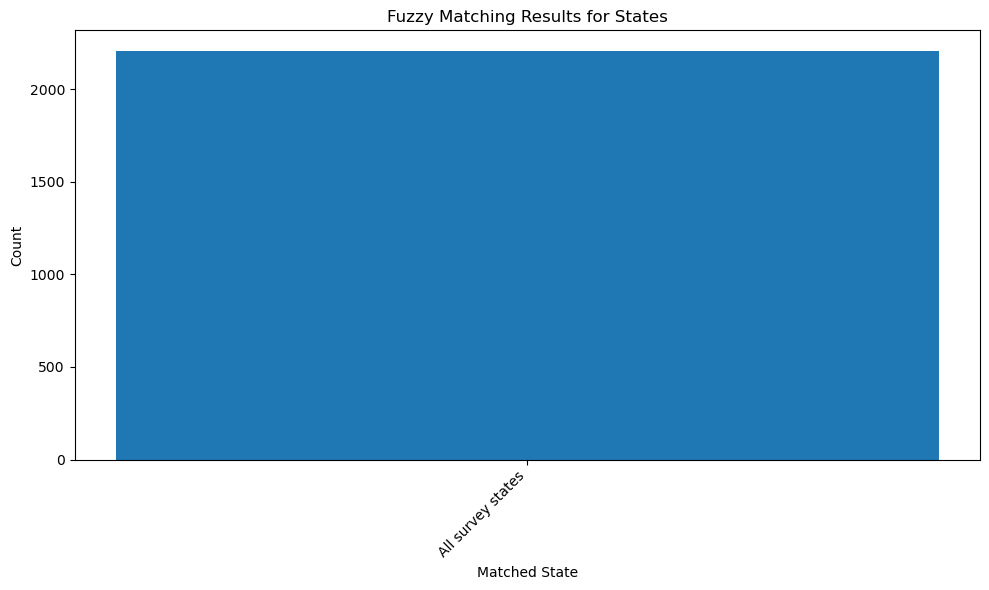

In [170]:
# Create a DataFrame to store the matching results
matching_results = pd.DataFrame({'Original_State': survey_df['STATE'], 'Matched_State': survey_df['STATE_MATCH']})

# Count the occurrences of each matched state
state_counts = matching_results['Matched_State'].value_counts()

# Sort the states based on the counts in descending order
state_counts = state_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Matched State')
plt.ylabel('Count')
plt.title('Fuzzy Matching Results for States')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

- Conducting Fuzzy Matching: We used fuzzywuzzy's 'process.extractOne' function to perform fuzzy matching between 'STATE' in 'survey_df' and 'STATE_NAME' in 'state_df'. We displayed the results in a bar plot to visualize the matches.

In [175]:
# Conduct fuzzy matching for 'YEAR' column in year_df for the year 2015
year_2015 = 2015
year_2015_match = fuzzy_match(str(year_2015), year_df['YEAR'], threshold=80)

# Filter 'year_df' for the matched year 2015
year_2015_df = year_df[year_df['YEAR'] == int(year_2015_match)]

# Merge 'survey_df' with 'year_2015_df' on the 'YEAR' column
merged_df = pd.merge(survey_df, year_2015_df, on='YEAR', how='inner')

# Print the merged DataFrame for the year 2015
merged_df.head()


,YEAR,STATE,REPORT,FARMTYPE,CATEGORY,CATEGORY_VALUE,CATEGORY2,CATEGORY2_VALUE,VARIABLE_ID,VARIABLE_NAME,...,VARIABLE_UNIT,VARIABLE_DESCRIPTION,VARIABLE_IS_INVALID,ESTIMATE,MEDIAN,STATISTIC,RSE,UNRELIABLE_ESTIMATE,DECIMAL_DISPLAY,STATE_MATCH
0,2015,ALL SURVEY STATES,Farm Business Income Statement,All Farms,Farm Typology,Retirement farms (2011 to present),All Farms,TOTAL,igcfi,Gross cash farm income,...,Dollars per farm,For farms participating in government programs...,False,22597.0,5727.0,MEAN,12.5,0,0,All survey states
1,2015,ALL SURVEY STATES,Farm Business Income Statement,All Farms,Farm Typology,Off-farm occupation farms (2011 to present),All Farms,TOTAL,igcfi,Gross cash farm income,...,Dollars per farm,For farms participating in government programs...,False,21002.0,5000.0,MEAN,4.4,0,0,All survey states
2,2015,ALL SURVEY STATES,Farm Business Income Statement,All Farms,NASS Region,Atlantic region,All Farms,TOTAL,igcfi,Gross cash farm income,...,Dollars per farm,For farms participating in government programs...,False,81982.0,7419.0,MEAN,4.5,0,0,All survey states
3,2015,ALL SURVEY STATES,Farm Business Income Statement,All Farms,Farm Resource Region,Eastern Uplands,All Farms,TOTAL,igcfi,Gross cash farm income,...,Dollars per farm,For farms participating in government programs...,False,38971.0,6200.0,MEAN,8.0,0,0,All survey states
4,2015,ALL SURVEY STATES,Farm Business Income Statement,All Farms,Economic Class,"Less than $100,000",All Farms,TOTAL,igcfi,Gross cash farm income,...,Dollars per farm,For farms participating in government programs...,False,20462.0,6000.0,MEAN,3.6,0,0,All survey states


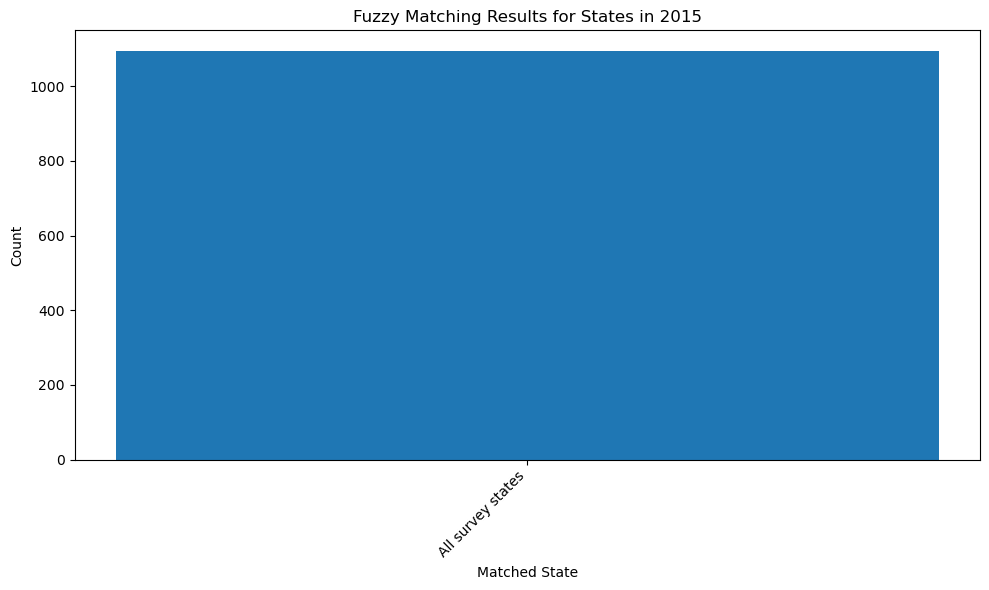

In [176]:
# Conduct fuzzy matching for 'STATE' column in survey_df for the year 2015
year_2015 = 2015
year_2015_survey_df = survey_df[survey_df['YEAR'] == year_2015].copy()
year_2015_survey_df['STATE_MATCH'] = year_2015_survey_df['STATE'].apply(fuzzy_match, args=(state_df['STATE_NAME'],))

# Create a DataFrame to store the matching results
matching_results = pd.DataFrame({'Original_State': year_2015_survey_df['STATE'], 'Matched_State': year_2015_survey_df['STATE_MATCH']})

# Count the occurrences of each matched state
state_counts = matching_results['Matched_State'].value_counts()

# Sort the states based on the counts in descending order
state_counts = state_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Matched State')
plt.ylabel('Count')
plt.title(f'Fuzzy Matching Results for States in {year_2015}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

- Fuzzy Matching for a Specific Year: We conducted fuzzy matching for the 'STATE' column in 'survey_df' for the year 2015, visualized the results in a bar plot, and printed the DataFrame with the fuzzy matching results.

In [177]:
# Filter 'survey_df' for the year 2015
year_2015 = 2015
year_2015_survey_df = survey_df[survey_df['YEAR'] == year_2015].copy()
year_2015_survey_df['STATE_MATCH'] = year_2015_survey_df['STATE'].apply(fuzzy_match, args=(state_df['STATE_NAME'],))

# Print the DataFrame with the fuzzy matching results for the year 2015
print(year_2015_survey_df)

# Calculate and print the percentiles for 'ESTIMATE' column for the year 2015
percentiles = year_2015_survey_df['ESTIMATE'].quantile([0.25, 0.50, 0.75])
print('\nPercentiles for ESTIMATE in the year 2015:')
print(percentiles)

      YEAR              STATE                          REPORT   FARMTYPE  \
102   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
103   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
113   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
121   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
129   2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
...    ...                ...                             ...        ...   
2959  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2960  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2967  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2971  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   
2972  2015  ALL SURVEY STATES  Farm Business Income Statement  All Farms   

                  CATEGORY                               CATEGORY_VALUE  \
102         

- Calculating Percentiles: Finally, we calculated and printed the percentiles (25th, 50th, and 75th) for the 'ESTIMATE' column in the 'year_2015_survey_df'.

##### Conclusion:

In this project milestone, we focused on data retrieval from the USDA Economic Research Service (ERS) API and comprehensive data formatting. The goal was to prepare the data for analysis, covering endpoints such as year data, state data, and survey data for the years 2015 and 2016. Below is a unified summary of the data formatting steps:

Data Retrieval and Formatting:
- Year Data and State Data: We made API calls to fetch data for both the 'year' and 'state' endpoints. The retrieved data was formatted and stored in DataFrames - 'year_df' to contain the years and 'state_df' to store state-related data. In the process, we ensured consistent headers and made appropriate data type conversions, like converting the 'ID' and 'STATE_CODE' columns to the desired data types and making the 'STATE' column uppercase for uniformity.

- Survey Data: We fetched survey data for the years 2015 and 2016 from the 'surveydata' endpoint. The data was processed and organized into the 'survey_df' DataFrame, and column headers were standardized for consistency.

Data Cleaning and Transformation:
- Handling Duplicates: To ensure data integrity, we checked for and addressed any duplicate rows in the 'year_df', 'state_df', and 'survey_df' DataFrames.

- Removing Outliers: We employed the Z-score method to identify and handle outliers in the 'ESTIMATE', 'MEDIAN', and 'RSE' columns within the 'survey_df' DataFrame.

- Fixing Casing and Inconsistent Values: To achieve data consistency, we converted the 'STATE' column in 'survey_df' to uppercase and replaced any inconsistent state abbreviations with their standard counterparts.

Data Standardization:
- Conducting Fuzzy Matching: Utilizing fuzzywuzzy's 'process.extractOne' function, we performed fuzzy matching between the 'STATE' column in 'survey_df' and the 'STATE_NAME' column in 'state_df'. This approach helped in standardizing state names and ensuring accurate representations.

Data Analysis:
- Fuzzy Matching for a Specific Year: We carried out fuzzy matching for the 'STATE' column in 'survey_df', specifically focusing on the year 2015. The matching results were visualized using a bar plot, and the DataFrame containing the fuzzy matching outcomes was presented.

- Calculating Percentiles: Finally, we calculated and displayed the percentiles (25th, 50th, and 75th) for the 'ESTIMATE' column within the 'year_2015_survey_df'. This statistical analysis provided valuable insights into the data distribution.

In conclusion, the data retrieval and comprehensive formatting steps, including cleaning, transformation, and standardization, effectively prepared the data for further analysis and exploration in subsequent project milestones.